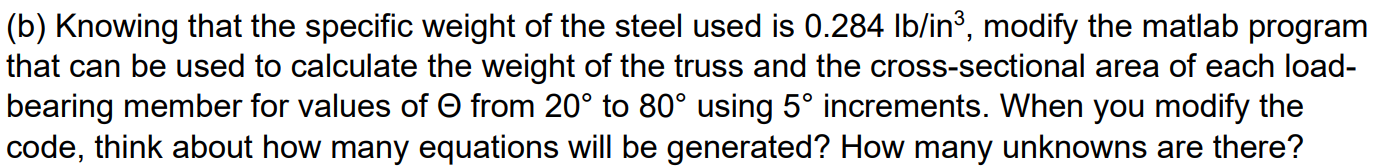
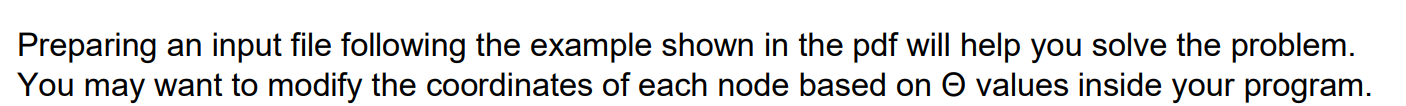

# Plan
The problem is complicated and let us break it into several steps. 
## 1. modify the code to calcuate the weight
a. How to calcuate weight $m$? $m=\rho AL$ both density $\rho=0.284~lb/in^3$, length $L$ can be calcuated based on the geometry, cross section $A$ can be caculated as the internal force for each member divided by the maximum allowed stress

b. how to do it in the code? we should define an array $A$ and $L$ for each member, and calcuate them. $L$ can be calcuated easily based on the coordinates of the ending points connected for the element. We can loop over all the elements. 

c. what about area $A$? well, $A=F/\sigma$, so $A$ should be calcuated after we find the internal force $F$. Again, we do it for each member.

d. what about the zero force member? we can assume it takes the average area. 

e. It is a good idea to save the weight as we need it to find the optimal angle later, we can save it as output. The first line of the code can be

```
function [weight]=trussWeight(file_name)
```

## 2. modify the code to calcuate the weight at different angle $\theta$

a. The most naive approach is to generate the different input files, each input file correspond to one angle $\theta$, you can do it on your calcuator and save the coordinates for each node

b. wait, why do we need a calculator again? don't we have matlab? we should be able to ask matlab to do it. Realizing that changing angle only changing the coordinates for node B, D, E? so we can use two inputs for the function:
```
function [weight]=trussWeightAngle(file_name,theta);
```
So to calcuate the `weight` for different `theta` would be as easy as creating a script file

```
clear
theta = 20:5:50;
n_theta = length(theta);
weights  =zeros(n_theta,1);
for i = 1:n_theta
    weights(i)=trussWeightAngle(file_name,theta(i))
end
[minW,id ]=min(weights) % find the mininum weight and the index
minAngle = theta(id) % the angle that reaches minimum weight
```